In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '80f9ec6c-f06c-4bf9-a2a6-454c205cf0bd',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2023-08-20T17:31:24.097Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9541}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10392, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)



dict

In [3]:
import pandas as pd


In [4]:
##this will make it easy to read in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_2948\2712669046.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']= pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.946304e+07,1.946304e+07,...,48.0196,5.477444e+11,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
1,1027,Ethereum,ETH,ethereum,7238,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202116e+08,1.202116e+08,...,19.0024,2.008906e+11,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
2,825,Tether USDt,USDT,tether,59698,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284648e+10,8.668426e+10,...,7.8364,8.668261e+10,NaN,2023-08-20T17:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-20 17:32:14.811039
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538518e+08,1.538518e+08,...,3.1500,3.330159e+10,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
4,52,XRP,XRP,xrp,1034,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,...,2.6838,5.370029e+10,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11156,dYdX,DYDX,dydx,260,2021-08-03T00:00:00.000Z,"[defi, derivatives, zero-knowledge-proofs, thr...",1.000000e+09,1.562562e+08,1.000000e+09,...,0.0289,1.953879e+09,NaN,2023-08-20T17:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0x92d6c1e31e14520e676a687f0a93788b716beff5,2023-08-20 17:32:14.811039
96,7950,Flare,FLR,flare,53,2020-12-11T00:00:00.000Z,[],NaN,2.268382e+10,1.005598e+11,...,0.0284,1.330886e+09,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
97,7501,WOO Network,WOO,wootrade,197,2020-10-23T00:00:00.000Z,"[centralized-exchange, three-arrows-capital-po...",NaN,1.735669e+09,2.250659e+09,...,0.0281,3.857316e+08,NaN,2023-08-20T17:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0x4691937a7508860f876c9c0a2a617e7d9e945d4b,2023-08-20 17:32:14.811039
98,5632,Arweave,AR,arweave,92,2020-05-27T00:00:00.000Z,"[distributed-computing, filesharing, storage, ...",6.600000e+07,6.545418e+07,6.545418e+07,...,0.0278,2.966110e+08,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039


In [8]:
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '80f9ec6c-f06c-4bf9-a2a6-454c205cf0bd',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
    
df2 = pd.json_normalize(data['data'])
df2['timestamp']= pd.to_datetime('now')
df = df.append(df2)    
    
if not os.path.isfile(r'C:\Users\Admin\Downloads\New folder (2)\Api.csv'):
      df.to_csv(r'C:\Users\Admin\Downloads\New folder (2)\Api.csv',header='column_name')                
else:
     df.to_csv(r'C:\Users\Admin\Downloads\New folder (2)\Api.csv',header='column_name', mode='a',header=False)
    

{'status': {'timestamp': '2023-08-20T17:50:53.581Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9541}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10392, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Admin\AppData\Local\Temp\ipykernel_2948\436288925.py:24: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp']= pd.to_datetime('now')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2948\436288925.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


SyntaxError: keyword argument repeated: header (436288925.py, line 30)

In [9]:
import os
from time import time
from time import sleep

for i in range (333):
    api_runner()
    print('ApI Runner completed')
        
    sleep(60)#sleep for 1 mintue
exit()

ApI Runner completed
ApI Runner completed
ApI Runner completed
ApI Runner completed


KeyboardInterrupt: 

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.946304e+07,1.946304e+07,...,48.0196,5.477444e+11,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
1,1027,Ethereum,ETH,ethereum,7238,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202116e+08,1.202116e+08,...,19.0024,2.008906e+11,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
2,825,Tether USDt,USDT,tether,59698,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284648e+10,8.668426e+10,...,7.8364,8.668261e+10,NaN,2023-08-20T17:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-20 17:32:14.811039
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538518e+08,1.538518e+08,...,3.1500,3.330159e+10,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
4,52,XRP,XRP,xrp,1034,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,...,2.6838,5.370029e+10,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11156,dYdX,DYDX,dydx,260,2021-08-03T00:00:00.000Z,"[defi, derivatives, zero-knowledge-proofs, thr...",1.000000e+09,1.562562e+08,1.000000e+09,...,0.0289,1.958175e+09,NaN,2023-08-20T17:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0x92d6c1e31e14520e676a687f0a93788b716beff5,2023-08-20 17:50:52.390075
96,7950,Flare,FLR,flare,53,2020-12-11T00:00:00.000Z,[],NaN,2.268382e+10,1.005598e+11,...,0.0285,1.336793e+09,NaN,2023-08-20T17:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:50:52.390075
97,7501,WOO Network,WOO,wootrade,197,2020-10-23T00:00:00.000Z,"[centralized-exchange, three-arrows-capital-po...",NaN,1.735669e+09,2.250659e+09,...,0.0283,3.882833e+08,NaN,2023-08-20T17:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0x4691937a7508860f876c9c0a2a617e7d9e945d4b,2023-08-20 17:50:52.390075
98,5632,Arweave,AR,arweave,92,2020-05-27T00:00:00.000Z,"[distributed-computing, filesharing, storage, ...",6.600000e+07,6.545418e+07,6.545418e+07,...,0.0279,2.981560e+08,NaN,2023-08-20T17:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:50:52.390075


In [13]:
pd.set_option ('display.float_format',lambda x:'%.5f' %x)

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19463037.00000,19463037.00000,...,48.01960,547744383502.53998,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
1,1027,Ethereum,ETH,ethereum,7238,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120211597.00155,120211597.00155,...,19.00240,200890625407.94000,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
2,825,Tether USDt,USDT,tether,59698,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82846484080.77916,86684257831.18761,...,7.83640,86682608321.14999,NaN,2023-08-20T17:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-20 17:32:14.811039
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153851794.97479,153851794.97479,...,3.15000,33301594118.94000,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
4,52,XRP,XRP,xrp,1034,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52841868447.00000,99988501123.00000,...,2.68380,53700292855.40000,NaN,2023-08-20T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:32:14.811039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11156,dYdX,DYDX,dydx,260,2021-08-03T00:00:00.000Z,"[defi, derivatives, zero-knowledge-proofs, thr...",1000000000.00000,156256174.00000,1000000000.00000,...,0.02890,1958175240.36000,NaN,2023-08-20T17:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x92d6c1e31e14520e676a687f0a93788b716beff5,2023-08-20 17:50:52.390075
96,7950,Flare,FLR,flare,53,2020-12-11T00:00:00.000Z,[],NaN,22683821332.67469,100559787198.00000,...,0.02850,1336793263.18000,NaN,2023-08-20T17:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:50:52.390075
97,7501,WOO Network,WOO,wootrade,197,2020-10-23T00:00:00.000Z,"[centralized-exchange, three-arrows-capital-po...",NaN,1735668828.40152,2250658857.90186,...,0.02830,388283338.30000,NaN,2023-08-20T17:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x4691937a7508860f876c9c0a2a617e7d9e945d4b,2023-08-20 17:50:52.390075
98,5632,Arweave,AR,arweave,92,2020-05-27T00:00:00.000Z,"[distributed-computing, filesharing, storage, ...",66000000.00000,65454185.00000,65454185.00000,...,0.02790,298156003.31000,NaN,2023-08-20T17:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-20 17:50:52.390075


In [16]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [74]:
df3=df.groupby('name',sort=False)[[ 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.14460,0.08750,-11.12484,-12.64355,-12.82435,-2.68100
Ethereum,0.28535,-0.26224,-9.46873,-11.69886,-10.26714,-7.78048
Tether USDt,-0.00145,0.00830,0.05940,-0.00615,0.01168,-0.02160
BNB,0.30182,-0.45860,-9.91071,-11.29612,-13.04721,-30.11877
XRP,0.25331,3.93662,-14.37671,-31.30877,8.43229,18.36131
...,...,...,...,...,...,...
dYdX,0.55013,-0.69105,-11.24055,-10.03506,7.34310,-6.16523
Flare,0.12866,-1.38861,-12.52721,-9.49863,-14.99304,-52.39604
WOO Network,0.32742,-0.99567,-7.69892,-20.12514,-19.44373,-22.52385


In [75]:
df4 = df3.stack()
df4

name                                       
Bitcoin        quote.USD.percent_change_1h      0.14460
               quote.USD.percent_change_24h     0.08750
               quote.USD.percent_change_7d    -11.12484
               quote.USD.percent_change_30d   -12.64355
               quote.USD.percent_change_60d   -12.82435
                                                 ...   
Akash Network  quote.USD.percent_change_24h    -9.31958
               quote.USD.percent_change_7d     17.60012
               quote.USD.percent_change_30d   119.76398
               quote.USD.percent_change_60d   102.89276
               quote.USD.percent_change_90d   244.73659
Length: 600, dtype: float64

In [76]:
type(df4)

pandas.core.series.Series

In [77]:
df5= df4.to_frame(name ='values')

In [78]:
df5

values
name                                                
Bitcoin       quote.USD.percent_change_1h    0.14460
              quote.USD.percent_change_24h   0.08750
              quote.USD.percent_change_7d  -11.12484
              quote.USD.percent_change_30d -12.64355
              quote.USD.percent_change_60d -12.82435
...                                              ...
Akash Network quote.USD.percent_change_24h  -9.31958
              quote.USD.percent_change_7d   17.60012
              quote.USD.percent_change_30d 119.76398
              quote.USD.percent_change_60d 102.89276
              quote.USD.percent_change_90d 244.73659

[600 rows x 1 columns]

In [79]:
df5.count()

values    600
dtype: int64

In [80]:
 
index =pd.RangeIndex(700)
df6 = df5.reset_index()

In [81]:
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.14460
1,Bitcoin,quote.USD.percent_change_24h,0.08750
2,Bitcoin,quote.USD.percent_change_7d,-11.12484
3,Bitcoin,quote.USD.percent_change_30d,-12.64355
4,Bitcoin,quote.USD.percent_change_60d,-12.82435
...,...,...,...
595,Akash Network,quote.USD.percent_change_24h,-9.31958
596,Akash Network,quote.USD.percent_change_7d,17.60012
597,Akash Network,quote.USD.percent_change_30d,119.76398
598,Akash Network,quote.USD.percent_change_60d,102.89276


In [82]:
df7=df6.rename(columns={'level_1':'percent_change'})

In [83]:
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.14460
1,Bitcoin,quote.USD.percent_change_24h,0.08750
2,Bitcoin,quote.USD.percent_change_7d,-11.12484
3,Bitcoin,quote.USD.percent_change_30d,-12.64355
4,Bitcoin,quote.USD.percent_change_60d,-12.82435
...,...,...,...
595,Akash Network,quote.USD.percent_change_24h,-9.31958
596,Akash Network,quote.USD.percent_change_7d,17.60012
597,Akash Network,quote.USD.percent_change_30d,119.76398
598,Akash Network,quote.USD.percent_change_60d,102.89276


In [84]:
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


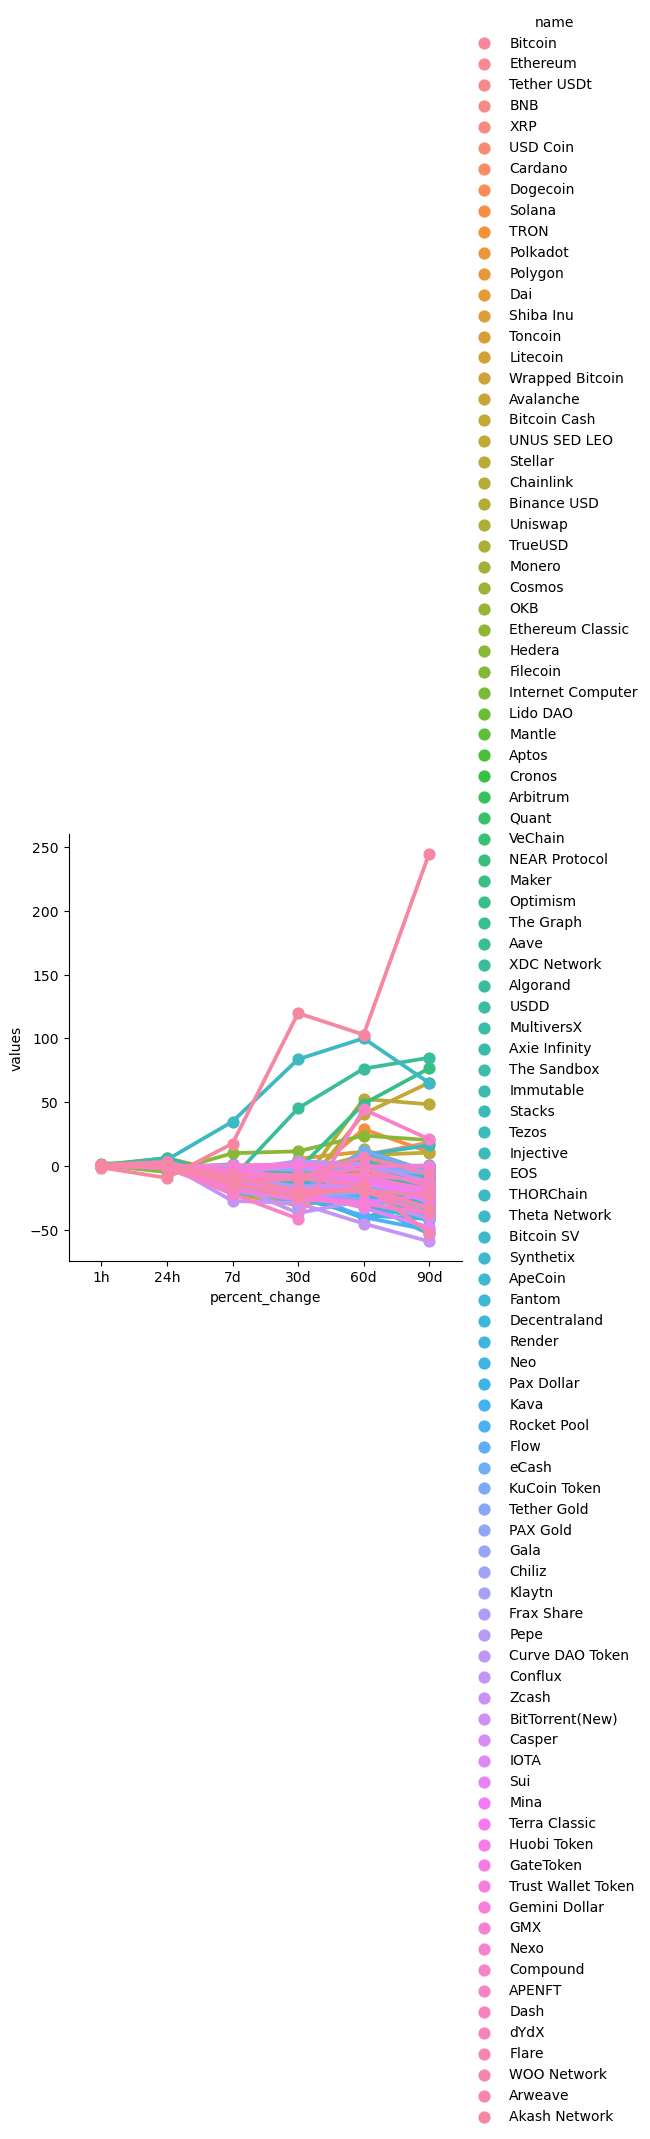

In [86]:
sns.catplot(x ='percent_change',y='values',hue='name',data=df7,kind='point')

In [73]:
df7['percent_change']

0      quote.USD.volume_change_24h
1                               1h
2                              24h
3                               7d
4                              30d
                  ...             
695                            24h
696                             7d
697                            30d
698                            60d
699                            90d
Name: percent_change, Length: 700, dtype: object

In [93]:
df10= df[['name','quote.USD.market_cap_dominance','timestamp']]
df10=df10.query("name == 'Bitcion'")


,name,quote.USD.market_cap_dominance,timestamp
